# <p style="padding:10px;background-color:#85BB65;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">data transformation</p>


**Data transformation is a common technique used in statistics and data analysis to modify the distribution or structure of data. It can help to meet the assumptions of statistical models, improve the interpretability of results, and address issues like nonlinearity, heteroscedasticity, and outliers.**

Three commonly used data transformations are **<span style='color:#85BB65'>log transformation</span>**, **<span style='color:#85BB65'>exponential transformation</span>** and **<span style='color:#85BB65'>Box-Cox transformation</span>**.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox

In [2]:
df = pd.read_csv('College.csv')
df.head()

,name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
def plot_num_column(df ,feature):
    
    print(f"the skewness value of {feature} column = {df[feature].skew():.2f}")
    
    plt.title('histgram')
    sns.histplot(data=df, x=feature, kde=True,bins=30)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')

the skewness value of Personal column = 1.74


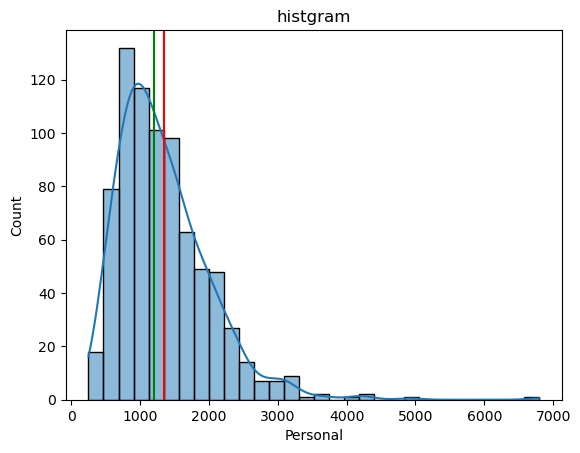

In [4]:
plot_num_column(df , 'Personal')

# <b>I <span style='color:#85BB65'>|</span> Log Transformation:</b> 

The **<span style='color:#85BB65'>log transformation</span>** involves taking the logarithm of the values in a dataset.

**It's useful when:**
* the data spans a large range. 
* the relationship between variables appears to be exponential.
* The logarithm function compresses large values and expands small values, making the distribution more symmetrical. 
* reducing the impact of extreme values.

In [5]:
df1 = df.copy()

the skewness value of Personal column = -0.11


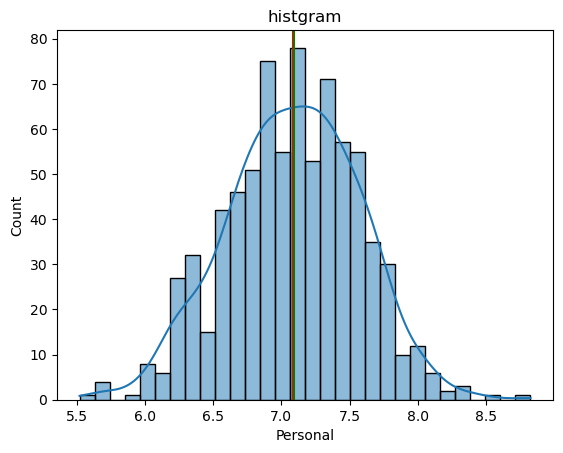

In [6]:
df1['Personal'] = np.log(df1['Personal'])

# check
plot_num_column(df1 , 'Personal')

<div style="border-radius:10px;border:#85BB65 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
you can see the distribution look approximately normal and reduce the impact of extreme values 
</div>


# <b>II <span style='color:#85BB65'>|</span> Square root transformation:</b> 

The **<span style='color:#85BB65'>Square root transformation</span>** is primarily used to stabilize the variance of data and reduce skewness. 

**It's useful when:**
* the variability of the data increases with the mean, a common occurrence in many real-world datasets. 
* the transformation compresses higher values and expands lower values, helping to create a more balanced and symmetric distribution.
* reducing skewness.

> The square root transformation is commonly applied to non-negative continuous variables. It is not appropriate for variables that contain negative values or zero. For data with a mix of positive and negative values, alternative transformations such as log transformation may be more suitable.

In [7]:
df2 = df.copy()

the skewness value of Personal column = 0.67


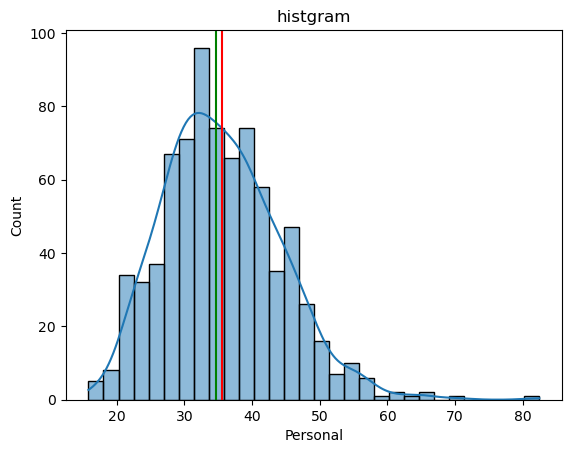

In [8]:
df2['Personal'] = np.sqrt(df2['Personal'])

#ckeck
plot_num_column(df2 , 'Personal')

# <b>III <span style='color:#85BB65'>|</span> Box-Cox Transformation:</b> 

Imagine you have a dataset of monthly electricity consumption for households. The data may exhibit a skewed distribution with a long tail towards higher values. By applying a **<span style='color:#85BB65'>Box-Cox transformation</span>**, you can find the optimal power transformation that makes the data approximately normally distributed. This can help in fitting a linear regression model to identify factors that affect electricity consumption.

In [9]:
df3 = df.copy()

the skewness value of Personal column = -0.00


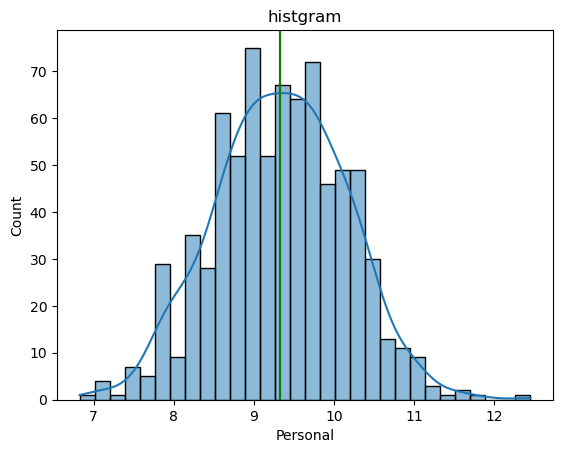

In [10]:
# Apply the Box-Cox transformation
col_bc ,_ ,_ = boxcox(df3['Personal'],alpha=0.05)


df3['Personal']=col_bc
# check
plot_num_column(df3 , 'Personal')

# <b>IV <span style='color:#85BB65'>|</span> Conclusion:</b> 


<div style="border-radius:10px;border:#85BB65 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
the data which transformed by Box-Cox Transformation has lowest value of skewness .then comes the one that transformed using log transformation and in the end using square root transformation.</div>


***

<br>

<div style="text-align: center;">
   <span style="font-size: 4.5em; font-weight: bold; font-family: Arial;">THANK YOU!</span>
</div>/

<br>
<br>

<div style="text-align: center;">
    <span style="font-size: 5em;">✔️</span>
</div>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.4em; font-weight: bold; font-family: Arial; max-width:1200px; display: inline-block;">
       If you find this notebook useful, I'd greatly appreciate your upvote!
   </span>
</div>
